# Warehouse Optimization 
This is the environment code for the **Warehouse Problem statement** <br > 
It is a simplistic ***reinforcement learning*** environment where we are giving rewards to the robot based on where it gets the requested items from. Though, the rewards are set based on the get requests, we need to optimize the ***store()*** function, such that it stores the items in the racks leading to an optimized ***get()*** function. 

In [1]:
import random 
import numpy as np 

import collections
import sys 
import matplotlib.pyplot as plt 

Number of racks and items as defined for the initial problem statement. <br /> 
'''
Making a global variable warehouse. 
It is a dictionary of the format: 
{ rack: (item, quantity) } 
'''

In [2]:
#nRacks = 12 
#nItems = 5 

#warehouse = {a: (0,0) for a in range(1, nRacks+1)} 

**Store()** to store a given (item, quantity) in a rack. <br > 
**Dictionary ->  rack: (item id, item quantity)** <br >

In [3]:
def cyclic(rack): 
    if rack == 1: 
        return 12 
    else: 
        return rack-1 


#for i in range(1,13):
#    print cyclic(i) 


In [4]:
def warehousefull(warehouse): 
    #global warehouse 
    count = 0 
    for i in range(1,13): 
        if (warehouse[i] == (0,0)): break 
        else: count = count + 1 
    if (count == 12): return True
    else: return False 
#print warehousefull() 

In [5]:
def Store(rack, item, quantity): 
    if (rack not in warehouse): print "No rack {} in warehouse".format(rack) # No such rack exists  
    elif warehouse[rack] == (0,0): # Empty rack 
         warehouse[rack] = (item, quantity) 
         print("Stored item {} Successfully in an empty rack {} ".format(item, rack)) 
    elif (warehouse[rack][0] == item): # Rack already has some qauntity of that item 
        warehouse[rack] = (item, warehouse[rack][1]+quantity) 
        print "Updated Quantity of item {} in rack {} ".format(item, rack) 
    elif (warehousefull(warehouse) == True): print "Warehouse is Full!" 
    else: # Some other item is in that rack 
        print "Item {} has occupied the rack {}. Kindly store item {} somehere else. Thank you :)".format(warehouse[rack][0], rack, item) 
        print "cycle rack:", str(cyclic(rack))
        Store(cyclic(rack), item, quantity) 



Initialize the warehouse 


In [6]:
def initialise_warehouse(): 
    global nRacks, nItems, warehouse 
    nRacks = 12 
    nItems = 5 

    warehouse = {a: (0,0) for a in range(1, nRacks+1)} #re-initailizing to (0,0) for each rack 

    Store(1, 1, 10) 
    Store(2, 3, 10) 
    Store(5, 2, 10) 
    Store(11, 5, 10) 
    Store(8, 4, 10) 
#initialise_warehouse() 

Utility function to **print the Warehouse's State** <br > 

1->(0, 0)   4->(0, 0)	7->(0, 0)	10->(0, 0)	
2->(0, 0)	5->(0, 0)	8->(0, 0)   11->(0, 0)	
3->(0, 0)	6->(0, 0)	9->(0, 0)	12->(0, 0)	


In [7]:
def print_warehouse(): 
    print 
    print "    I    " 
    print 
    for i in warehouse: 
        print str(i) + "->" + str(warehouse[i]) + "\t" 
        if i % 3 == 0: 
            print 
    print "    O    "
initialise_warehouse() 
print_warehouse() 

Stored item 1 Successfully in an empty rack 1 
Stored item 3 Successfully in an empty rack 2 
Stored item 2 Successfully in an empty rack 5 
Stored item 5 Successfully in an empty rack 11 
Stored item 4 Successfully in an empty rack 8 

    I    

1->(1, 10)	
2->(3, 10)	
3->(0, 0)	

4->(0, 0)	
5->(2, 10)	
6->(0, 0)	

7->(0, 0)	
8->(4, 10)	
9->(0, 0)	

10->(0, 0)	
11->(5, 10)	
12->(0, 0)	

    O    


Rewards definition based on rack's location from the output (delivery) gate 

In [8]:
def rewards(rack): 
    ''' 
    if rack in range(1,4): return -400 
    elif rack in range(4,7): return -300 
    elif rack in range(7,10): return -200 
    elif rack in range(10,13): return -100 
    else: return 0 # Wrong rack 
    ''' 
    if rack in range(1,4): return 50 
    elif rack in range(4,7): return 200 
    elif rack in range(7,10): return 350 
    elif rack in range(10,13): return 500 
    else: return 0 # Wrong rack 


**Get()** function to search for a requested item in the warehouse and get (deliver) it to the delivery gate and return a corresponding immediate reward for it. 

In [9]:
def Get(item, quantity): 
    rack = 0
    for i in warehouse: 
        if item in warehouse[i]: 
             rack = i # Rack number 

    #immediate reward 
    reward = -100



    if (rack == 0): print "Item {} not in warehouse".format(item) # No such rack exists  
    elif warehouse[rack] == (0,0): # Empty rack 
         print "Rack {} is an empty rack ".format(rack)
    elif (warehouse[rack][0] == item): # Rack already has some qauntity of that item 
        if (warehouse[rack][1] >= quantity): 
            warehouse[rack] = (item, warehouse[rack][1]-quantity) 
            #immediate reward 
            reward = rewards(rack)
            print "Delivery Successful" 
        else: 
            reward = rewards(rack) 
            warehouse[rack] = (0,0) 
            print "Quantity {} of item {} is unavailable currently. Delivered {} quantity as of now! ".format(quantity, item, warehouse[rack][1])
    else: # Some other item is in that rack 
        print "Item {} asked for is in rack {}. Kindly Get is from there. Thank you :)".format(item, rack) 

    return rack, reward 

    '''         
    done = False 
    info = 'info' 
    return [warehouse, reward, done, info] 
    ''' 

For testing the functions implemented till now :) 

In [10]:
def test(): 
    #testing Store() function 
    print "Testing Store() " 
    initialise_warehouse() 
    print_warehouse() 

    #further testing of Store() function 
    print "Further testing Store() " 
    Store(100, 4, 10) # No rack 100 
    Store(11,1,10) # Rack 11 already has item 5 
    print_warehouse() 

    # Testing of Get() function 
    print "Testing Get() " 
    print Get(5, 5) 
    print Get(4, 5) 
    print Get(2, 4) 

    print Get(11, 10) # No rack 100 
    print Get(1,100) # Rack 11 already has item 5 

    print_warehouse() 

#test() 

## Reinforcement Learning (RL) Strategies 

Running the ***RL script*** to accumulate the total rewards. <br > 
### Random Policy

In [11]:
initialise_warehouse() # just in case something has been modified (global variables) 
print_warehouse() 

Stored item 1 Successfully in an empty rack 1 
Stored item 3 Successfully in an empty rack 2 
Stored item 2 Successfully in an empty rack 5 
Stored item 5 Successfully in an empty rack 11 
Stored item 4 Successfully in an empty rack 8 

    I    

1->(1, 10)	
2->(3, 10)	
3->(0, 0)	

4->(0, 0)	
5->(2, 10)	
6->(0, 0)	

7->(0, 0)	
8->(4, 10)	
9->(0, 0)	

10->(0, 0)	
11->(5, 10)	
12->(0, 0)	

    O    


In [12]:
def random_strategy(): 
    rack = random.randint(1,12)  
    return rack 

In [13]:
def requests(): 
    requests = [] 
    for i in range(10000): 
        r = ""
        if (random.uniform(0,1) <= 0.4): r = r + "STORE " 
        else: r = r + "GET " 
        if random.uniform(0,1) < 0.25: 
            #to check whether the model is learning to store item 5 at a good (optimized) rack or not. 
            r = r + str(random.randint(1,4)) + " " + str(random.randint(1,1000))  
        else: r = r + "5 " + str(random.randint(1,1000))
              #r = r + str(random.randint(4,5)) + " " + str(random.randint(1,1000)) 
        requests.append(r) 
    #print requests[:2] 
    







    '''requests = ["STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", 
               "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", 
               "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", 
               "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", 
               "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", 
               "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", 
               "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", 
               "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", "GET 1 1000", 
               "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", 
               "STORE 1 1000", "STORE 1 1000", "STORE 1 1000", "STORE 1 1000"] ''' 

    '''requests = ["STORE 4 1000", "STORE 5 1000", 
                "STORE 1 10000", "STORE 2 1000", 
                "STORE 3 1000", "STORE 2 1000", 
                "STORE 1 1000", "GET 4 20", "GET 4 20", "GET 4 20", "GET 4 20", "GET 4 20", 
                "GET 3 20", "GET 2 20", 
                "GET 1 20", "GET 5 20", "GET 5 20", "GET 5 20", 
                "STORE 4 100", "STORE 2 100", 
                "STORE 1 100", "GET 1 100", "GET 1 100", 
               "GET 1 100", "GET 1 100", "GET 1 100", 
               "GET 1 100", "GET 1 100", "GET 1 100", 
               "GET 1 100", "GET 1 100", "GET 1 100", 
               "GET 1 100", "GET 1 100", "GET 1 100", "STORE 1 100", "STORE 2 100", 
               "STORE 3 100", "STORE 4 100", "STORE 5 100", ] ''' 
    return requests 
#requests()

In [14]:
def total_rewards(): 
    total_rewards = 0 
    requests_list = requests() 
    for req in requests_list: 
        r = req.split(' ') 
        reward = 0 
        if (r[0].strip() == "STORE"): 
            rack = random_strategy() #random racks allocated 
            #print rack 
            Store(rack, int(r[1]), int(r[2])) 
        else: #Get request 
            rack, reward = Get(int(r[1]), int(r[2])) 
            total_rewards = total_rewards + reward 
    #print_warehouse() 
    print "Total Rewards =", total_rewards 
    return total_rewards 

#total_rewards() 

In [15]:
def cum_rewards(): 
    cumulative_rewards = 0 
    reward_array = [] 
    for i in range(100): #number of episodes 
        total = total_rewards() 
        reward_array.append(total) 
        cumulative_rewards = cumulative_rewards + total 
        total = 0 
    print "Reward array =", reward_array 
    print "Cumulative Rewards =", cumulative_rewards 
    return cumulative_rewards 

print_warehouse() 
#c_rewards = cum_rewards() 


    I    

1->(1, 10)	
2->(3, 10)	
3->(0, 0)	

4->(0, 0)	
5->(2, 10)	
6->(0, 0)	

7->(0, 0)	
8->(4, 10)	
9->(0, 0)	

10->(0, 0)	
11->(5, 10)	
12->(0, 0)	

    O    


### Epsilon Greedy

In [16]:
def rankify(prob_dist): 
    seq = sorted(prob_dist) 
    ranks = [seq.index(v) for v in prob_dist] # highest probablity has highest rank 
    return ranks 
#rankify([1,2,3,4,5]) 
#rankify([0.25, 0.25, 0.25, 0.16666666666666666, 0.08333333333333333]) 
#rankify([0.7894736842105263, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842])

In [17]:
def probability_distribution(get_item_array): 
    counter=collections.Counter(get_item_array) 
    prob_dist = [] 
    for i in range(1,6): 
        if (get_item_array != []): prob_dist.append(float(counter[i])/sum(counter.values())) 
    return prob_dist
#probability_distribution([])

In [18]:
def action(item_rank, ranks): 
    action = 0 
    if max(ranks) == 0: 
        action = 0 
    elif item_rank == max(ranks): 
        action = random.randint(10,12) 
    elif item_rank == (max(ranks) - 1): 
        action = random.randint(7,9) 
    elif item_rank == (max(ranks) - 2): 
        action = random.randint(4,6) 
    else: 
        action = random.randint(1,3) 
    
    return action 
#action(3, [0, 0, 0, 0, 0]) 

In [19]:
def total_rewards_egreedy(): 
    total_rewards = 0 
    requests_list = requests() 
    epsilon = 0.4 
    get_item_array = [] 
    for req in requests_list: 
        r = req.split(' ') 
        reward = 0 
        if (r[0].strip() == "STORE"): 
            if(random.uniform(0,1) < epsilon): 
                print "Hello random"
                rack = random_strategy() #random racks allocated 
                Store(rack, int(r[1]), int(r[2])) 
            else: 
                print "Hello strategy"
                prob_dist = probability_distribution(get_item_array) 
                if (prob_dist != []): 
                    print "Check = ", prob_dist 
                    ranks = rankify(prob_dist) 
                    item_rank = ranks[int(r[1])-1]
                    rack = action(item_rank, ranks) 
                    #print "ranks =", ranks
                    #print "rack = ", rack, 
                    Store(rack, int(r[1]), int(r[2])) 
                else: 
                    print "Hello random"
                    rack = random_strategy() #random racks allocated 
                    Store(rack, int(r[1]), int(r[2])) 
        else: 
            _, reward = Get(int(r[1]), int(r[2])) 
            get_item_array.append(int(r[1])) # make get_item_array 
            total_rewards = total_rewards + reward 
    #print_warehouse() 
    print "Total Rewards =", total_rewards 
    return total_rewards 

#total_rewards_egreedy() 

In [20]:
def cum_rewards_egreedy(): 
    cumulative_rewards = 0 
    reward_array = [] 
    for i in range(100): #number of episodes 
        total = total_rewards_egreedy() 
        reward_array.append(total) 
        cumulative_rewards = cumulative_rewards + total 
        print_warehouse() 
        total = 0 
    print "Reward array =", reward_array 
    print "Cumulative Rewards =", cumulative_rewards 
    return cumulative_rewards 

#c_rewards = cum_rewards_egreedy() 
print_warehouse() 


    I    

1->(1, 10)	
2->(3, 10)	
3->(0, 0)	

4->(0, 0)	
5->(2, 10)	
6->(0, 0)	

7->(0, 0)	
8->(4, 10)	
9->(0, 0)	

10->(0, 0)	
11->(5, 10)	
12->(0, 0)	

    O    


# Q Learning 

In [21]:
def print_matrix(matrix): 
    for i in matrix: 
        for k in range(12): 
            print str(i[k]) +"\t",
        print 


In [22]:
rows, columns = 5, 12 
R = [[rewards(x+1) for x in range(columns)] for y in range(rows)] 
print "R = " 
print_matrix(R) 
Q = [[0 for x in range(columns)] for y in range(rows)] 
print "Q= " 
print_matrix(Q) 

R = 
50	50	50	200	200	200	350	350	350	500	500	500	
50	50	50	200	200	200	350	350	350	500	500	500	
50	50	50	200	200	200	350	350	350	500	500	500	
50	50	50	200	200	200	350	350	350	500	500	500	
50	50	50	200	200	200	350	350	350	500	500	500	
Q= 
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	


In [23]:
def rem(arr, action): 
    arr[action] = - sys.maxint 
    return arr 
rem([1,2,3],2)

[1, 2, -9223372036854775807]

In [24]:
def update_Q(state, action): 
    global Q 
    gamma = 0.8 
    Q[state][action] = R[state][action] + round(gamma * max(rem(Q[state],action)),2)  
#update_Q(0,1)
print_matrix(Q)

0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	


In [25]:
def egreedy(state): 
    global Q 
    epsilon = 0.6 
    if (random.uniform(0,1) < epsilon): 
        
        print "random", 
        action = random_strategy() 
    else: 
        print "Q", 
        action = Q[state].index(max(Q[state])) + 1 
    
    return action 
egreedy(2)

random

6

In [26]:
def plot(array, title="Graph", xlabel="X-axis", ylabel="Y-axis"): 
    plt.title(title) 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.plot(array) 
    plt.show() 
    #plt.close() 
#plot([1,2,3,4])

STORE 3 574
Q rack 10
Updated Quantity of item 3 in rack 10 
GET 5 150
Item 5 not in warehouse
GET 5 516
Item 5 not in warehouse
GET 5 424
Item 5 not in warehouse
GET 5 952
Item 5 not in warehouse
GET 5 43
Item 5 not in warehouse
GET 5 607
Item 5 not in warehouse
GET 5 825
Item 5 not in warehouse
GET 5 449
Item 5 not in warehouse
GET 5 521
Item 5 not in warehouse
GET 5 350
Item 5 not in warehouse
GET 5 836
Item 5 not in warehouse
GET 4 993
Delivery Successful
GET 1 246
Delivery Successful
STORE 5 25
random rack 5
Item 3 has occupied the rack 5. Kindly store item 5 somehere else. Thank you :)
cycle rack: 4
Item 3 has occupied the rack 4. Kindly store item 5 somehere else. Thank you :)
cycle rack: 3
Item 3 has occupied the rack 3. Kindly store item 5 somehere else. Thank you :)
cycle rack: 2
Stored item 5 Successfully in an empty rack 2 
GET 2 995
Item 2 not in warehouse
STORE 3 271
random rack 12
Stored item 3 Successfully in an empty rack 12 
STORE 5 669
Q rack 10
Item 3 has occupied t

cycle rack: 9
Item 4 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Item 3 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Updated Quantity of item 5 in rack 7 
GET 5 601
Quantity 601 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
STORE 4 884
Q rack 10
Item 1 has occupied the rack 10. Kindly store item 4 somehere else. Thank you :)
cycle rack: 9
Updated Quantity of item 4 in rack 9 
GET 5 175
Item 5 not in warehouse
STORE 3 305
random rack 1
Item 1 has occupied the rack 1. Kindly store item 3 somehere else. Thank you :)
cycle rack: 12
Item 1 has occupied the rack 12. Kindly store item 3 somehere else. Thank you :)
cycle rack: 11
Item 2 has occupied the rack 11. Kindly store item 3 somehere else. Thank you :)
cycle rack: 10
Item 1 has occupied the rack 10. Kindly store item 3 somehere else. Thank you :)
cycle rack: 9
Item 4 has occupied the rack 9. Kindly store item 3 somehere else. Than

Item 1 has occupied the rack 9. Kindly store item 4 somehere else. Thank you :)
cycle rack: 8
Updated Quantity of item 4 in rack 8 
STORE 5 76
random rack 8
Item 4 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Item 2 has occupied the rack 7. Kindly store item 5 somehere else. Thank you :)
cycle rack: 6
Updated Quantity of item 5 in rack 6 
STORE 5 336
random rack 10
Item 2 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Item 1 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Item 4 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Item 2 has occupied the rack 7. Kindly store item 5 somehere else. Thank you :)
cycle rack: 6
Updated Quantity of item 5 in rack 6 
STORE 5 849
Q rack 10
Item 2 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Item 1 has occupied the rack 9. Kindly store item 5 somehe

GET 5 178
Item 5 not in warehouse
GET 5 882
Item 5 not in warehouse
STORE 5 989
random rack 5
Item 4 has occupied the rack 5. Kindly store item 5 somehere else. Thank you :)
cycle rack: 4
Item 3 has occupied the rack 4. Kindly store item 5 somehere else. Thank you :)
cycle rack: 3
Item 3 has occupied the rack 3. Kindly store item 5 somehere else. Thank you :)
cycle rack: 2
Stored item 5 Successfully in an empty rack 2 
STORE 5 265
random rack 8
Item 4 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Stored item 5 Successfully in an empty rack 7 
GET 5 858
Quantity 858 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
GET 5 191
Delivery Successful
GET 5 625
Delivery Successful
GET 5 300
Quantity 300 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
STORE 5 434
random rack 4
Item 3 has occupied the rack 4. Kindly store item 5 somehere else. Thank you :)
cycle rack: 3
Item 3 has occupied the rack 3. Kindly store i

cycle rack: 3
Item 3 has occupied the rack 3. Kindly store item 5 somehere else. Thank you :)
cycle rack: 2
Updated Quantity of item 5 in rack 2 
GET 5 438
Delivery Successful
STORE 5 936
random rack 12
Stored item 5 Successfully in an empty rack 12 
GET 5 627
Delivery Successful
GET 5 689
Quantity 689 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
STORE 3 831
Q rack 10
Item 2 has occupied the rack 10. Kindly store item 3 somehere else. Thank you :)
cycle rack: 9
Updated Quantity of item 3 in rack 9 
STORE 5 920
random rack 1
Item 1 has occupied the rack 1. Kindly store item 5 somehere else. Thank you :)
cycle rack: 12
Stored item 5 Successfully in an empty rack 12 
STORE 3 884
random rack 11
Warehouse is Full!
STORE 5 789
random rack 8
Warehouse is Full!
GET 5 46
Delivery Successful
GET 5 945
Quantity 945 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
STORE 5 968
Q rack 10
Item 2 has occupied the rack 10. Kindly store item 5 somehere else. T

Q rack 11
Stored item 1 Successfully in an empty rack 11 
GET 5 233
Item 5 not in warehouse
GET 5 510
Item 5 not in warehouse
GET 4 666
Quantity 666 of item 4 is unavailable currently. Delivered 0 quantity as of now! 
GET 5 768
Item 5 not in warehouse
GET 5 854
Item 5 not in warehouse
GET 5 288
Item 5 not in warehouse
GET 4 240
Delivery Successful
GET 5 106
Item 5 not in warehouse
GET 5 100
Item 5 not in warehouse
GET 4 870
Delivery Successful
STORE 5 301
Q rack 10
Item 2 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Stored item 5 Successfully in an empty rack 9 
STORE 5 289
random rack 5
Item 4 has occupied the rack 5. Kindly store item 5 somehere else. Thank you :)
cycle rack: 4
Item 3 has occupied the rack 4. Kindly store item 5 somehere else. Thank you :)
cycle rack: 3
Item 3 has occupied the rack 3. Kindly store item 5 somehere else. Thank you :)
cycle rack: 2
Item 2 has occupied the rack 2. Kindly store item 5 somehere else. Thank you :)


Item 4 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Stored item 5 Successfully in an empty rack 8 
GET 5 792
Quantity 792 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
STORE 5 785
random rack 3
Item 3 has occupied the rack 3. Kindly store item 5 somehere else. Thank you :)
cycle rack: 2
Item 2 has occupied the rack 2. Kindly store item 5 somehere else. Thank you :)
cycle rack: 1
Item 1 has occupied the rack 1. Kindly store item 5 somehere else. Thank you :)
cycle rack: 12
Item 4 has occupied the rack 12. Kindly store item 5 somehere else. Thank you :)
cycle rack: 11
Stored item 5 Successfully in an empty rack 11 
GET 5 518
Delivery Successful
GET 2 520
Delivery Successful
GET 5 92
Delivery Successful
GET 3 70
Delivery Successful
STORE 5 699
random rack 2
Item 2 has occupied the rack 2. Kindly store item 5 somehere else. Thank you :)
cycle rack: 1
Item 1 has occupied the rack 1. Kindly store item 5 somehere else. Thank you

Q rack 10
Item 4 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Item 1 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Updated Quantity of item 5 in rack 8 
STORE 5 389
random rack 8
Updated Quantity of item 5 in rack 8 
GET 5 672
Quantity 672 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
GET 5 781
Delivery Successful
STORE 5 764
random rack 9
Item 1 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Updated Quantity of item 5 in rack 8 
GET 5 400
Delivery Successful
GET 5 287
Delivery Successful
GET 5 600
Quantity 600 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
GET 4 772
Delivery Successful
STORE 2 286
Q rack 10
Item 4 has occupied the rack 10. Kindly store item 2 somehere else. Thank you :)
cycle rack: 9
Item 1 has occupied the rack 9. Kindly store item 2 somehere else. Thank you :)
cycle rack: 8
Stored item 2 Successfully

STORE 1 353
random rack 4
Item 4 has occupied the rack 4. Kindly store item 1 somehere else. Thank you :)
cycle rack: 3
Item 3 has occupied the rack 3. Kindly store item 1 somehere else. Thank you :)
cycle rack: 2
Item 5 has occupied the rack 2. Kindly store item 1 somehere else. Thank you :)
cycle rack: 1
Item 3 has occupied the rack 1. Kindly store item 1 somehere else. Thank you :)
cycle rack: 12
Item 4 has occupied the rack 12. Kindly store item 1 somehere else. Thank you :)
cycle rack: 11
Stored item 1 Successfully in an empty rack 11 
GET 1 333
Delivery Successful
GET 1 230
Quantity 230 of item 1 is unavailable currently. Delivered 0 quantity as of now! 
STORE 5 618
Q rack 10
Item 2 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Stored item 5 Successfully in an empty rack 9 
GET 5 935
Quantity 935 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
STORE 1 211
random rack 7
Stored item 1 Successfully in an empty rack 7 
GE

Delivery Successful
STORE 5 346
random rack 4
Item 3 has occupied the rack 4. Kindly store item 5 somehere else. Thank you :)
cycle rack: 3
Item 3 has occupied the rack 3. Kindly store item 5 somehere else. Thank you :)
cycle rack: 2
Updated Quantity of item 5 in rack 2 
STORE 5 377
random rack 8
Stored item 5 Successfully in an empty rack 8 
STORE 5 65
random rack 3
Item 3 has occupied the rack 3. Kindly store item 5 somehere else. Thank you :)
cycle rack: 2
Updated Quantity of item 5 in rack 2 
GET 5 731
Delivery Successful
GET 5 344
Delivery Successful
STORE 5 630
Q rack 10
Item 1 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Updated Quantity of item 5 in rack 9 
GET 5 197
Delivery Successful
GET 5 984
Quantity 984 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
GET 5 198
Delivery Successful
GET 4 933
Item 4 not in warehouse
GET 5 904
Quantity 904 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
STORE

Q rack 10
Item 1 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Item 4 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Item 2 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Item 2 has occupied the rack 7. Kindly store item 5 somehere else. Thank you :)
cycle rack: 6
Item 1 has occupied the rack 6. Kindly store item 5 somehere else. Thank you :)
cycle rack: 5
Item 4 has occupied the rack 5. Kindly store item 5 somehere else. Thank you :)
cycle rack: 4
Item 1 has occupied the rack 4. Kindly store item 5 somehere else. Thank you :)
cycle rack: 3
Updated Quantity of item 5 in rack 3 
STORE 5 277
random rack 9
Item 4 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Item 2 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Item 2 has occupied the rack 7. Kindly store item 5 somehere else. Thank you :)

Q rack 10
Item 3 has occupied the rack 10. Kindly store item 4 somehere else. Thank you :)
cycle rack: 9
Updated Quantity of item 4 in rack 9 
STORE 5 388
Q rack 10
Item 3 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Item 4 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Item 3 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Item 1 has occupied the rack 7. Kindly store item 5 somehere else. Thank you :)
cycle rack: 6
Item 1 has occupied the rack 6. Kindly store item 5 somehere else. Thank you :)
cycle rack: 5
Item 2 has occupied the rack 5. Kindly store item 5 somehere else. Thank you :)
cycle rack: 4
Item 1 has occupied the rack 4. Kindly store item 5 somehere else. Thank you :)
cycle rack: 3
Item 4 has occupied the rack 3. Kindly store item 5 somehere else. Thank you :)
cycle rack: 2
Updated Quantity of item 5 in rack 2 
GET 4 999
Delivery Successful
GET 5 837
Deli

Q rack 10
Item 4 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Item 2 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Item 3 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Item 2 has occupied the rack 7. Kindly store item 5 somehere else. Thank you :)
cycle rack: 6
Item 4 has occupied the rack 6. Kindly store item 5 somehere else. Thank you :)
cycle rack: 5
Updated Quantity of item 5 in rack 5 
GET 5 316
Delivery Successful
GET 5 339
Delivery Successful
STORE 5 556
Q rack 10
Item 4 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Item 2 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Item 3 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Item 2 has occupied the rack 7. Kindly store item 5 somehere else. Thank you :)
cycle rack: 6
Item 4 has occupied th

GET 5 724
Delivery Successful
GET 5 540
Delivery Successful
GET 5 283
Delivery Successful
GET 5 161
Delivery Successful
STORE 2 281
random rack 10
Stored item 2 Successfully in an empty rack 10 
GET 5 474
Delivery Successful
GET 5 236
Delivery Successful
GET 5 45
Delivery Successful
GET 1 607
Item 1 not in warehouse
GET 1 135
Item 1 not in warehouse
STORE 4 69
Q rack 10
Item 2 has occupied the rack 10. Kindly store item 4 somehere else. Thank you :)
cycle rack: 9
Stored item 4 Successfully in an empty rack 9 
STORE 5 310
random rack 3
Item 3 has occupied the rack 3. Kindly store item 5 somehere else. Thank you :)
cycle rack: 2
Updated Quantity of item 5 in rack 2 
STORE 5 615
random rack 2
Updated Quantity of item 5 in rack 2 
STORE 1 174
random rack 7
Stored item 1 Successfully in an empty rack 7 
GET 2 303
Quantity 303 of item 2 is unavailable currently. Delivered 0 quantity as of now! 
STORE 5 451
Q rack 10
Stored item 5 Successfully in an empty rack 10 
GET 5 15
Delivery Successful

cycle rack: 8
Item 3 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Updated Quantity of item 5 in rack 7 
GET 4 486
Quantity 486 of item 4 is unavailable currently. Delivered 0 quantity as of now! 
GET 3 20
Delivery Successful
STORE 4 669
random rack 5
Stored item 4 Successfully in an empty rack 5 
STORE 5 369
random rack 7
Updated Quantity of item 5 in rack 7 
GET 5 202
Delivery Successful
STORE 5 730
Q rack 10
Item 2 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Item 3 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Item 3 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Updated Quantity of item 5 in rack 7 
GET 5 665
Delivery Successful
STORE 5 940
Q rack 10
Item 2 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Item 3 has occupied the rack 9. Kindly store item 5 somehere else. Thank you

Q rack 10
Item 5 has occupied the rack 10. Kindly store item 3 somehere else. Thank you :)
cycle rack: 9
Stored item 3 Successfully in an empty rack 9 
GET 2 303
Quantity 303 of item 2 is unavailable currently. Delivered 0 quantity as of now! 
GET 5 727
Delivery Successful
GET 5 210
Delivery Successful
GET 5 285
Quantity 285 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
GET 5 809
Quantity 809 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
GET 5 182
Delivery Successful
STORE 5 91
random rack 6
Stored item 5 Successfully in an empty rack 6 
GET 4 970
Quantity 970 of item 4 is unavailable currently. Delivered 0 quantity as of now! 
GET 4 545
Quantity 545 of item 4 is unavailable currently. Delivered 0 quantity as of now! 
STORE 5 352
random rack 1
Item 3 has occupied the rack 1. Kindly store item 5 somehere else. Thank you :)
cycle rack: 12
Stored item 5 Successfully in an empty rack 12 
GET 5 200
Delivery Successful
GET 5 473
Quantity 473 of i

Item 3 has occupied the rack 1. Kindly store item 5 somehere else. Thank you :)
cycle rack: 12
Stored item 5 Successfully in an empty rack 12 
GET 5 791
Quantity 791 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
GET 5 633
Delivery Successful
STORE 1 327
random rack 10
Item 3 has occupied the rack 10. Kindly store item 1 somehere else. Thank you :)
cycle rack: 9
Item 2 has occupied the rack 9. Kindly store item 1 somehere else. Thank you :)
cycle rack: 8
Stored item 1 Successfully in an empty rack 8 
STORE 5 555
random rack 4
Item 1 has occupied the rack 4. Kindly store item 5 somehere else. Thank you :)
cycle rack: 3
Item 2 has occupied the rack 3. Kindly store item 5 somehere else. Thank you :)
cycle rack: 2
Item 2 has occupied the rack 2. Kindly store item 5 somehere else. Thank you :)
cycle rack: 1
Item 3 has occupied the rack 1. Kindly store item 5 somehere else. Thank you :)
cycle rack: 12
Stored item 5 Successfully in an empty rack 12 
STORE 5 950
Q rack 10

STORE 5 622
Q rack 10
Updated Quantity of item 5 in rack 10 
STORE 5 11
random rack 9
Item 1 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Item 3 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Item 4 has occupied the rack 7. Kindly store item 5 somehere else. Thank you :)
cycle rack: 6
Item 1 has occupied the rack 6. Kindly store item 5 somehere else. Thank you :)
cycle rack: 5
Item 4 has occupied the rack 5. Kindly store item 5 somehere else. Thank you :)
cycle rack: 4
Updated Quantity of item 5 in rack 4 
GET 5 557
Delivery Successful
STORE 5 592
Q rack 10
Updated Quantity of item 5 in rack 10 
GET 4 184
Delivery Successful
GET 5 62
Delivery Successful
GET 5 731
Quantity 731 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
STORE 5 753
Q rack 10
Stored item 5 Successfully in an empty rack 10 
GET 1 170
Delivery Successful
STORE 3 513
Q rack 10
Item 5 has occupied the rack 10. Kindly st

Item 3 has occupied the rack 11. Kindly store item 5 somehere else. Thank you :)
cycle rack: 10
Item 1 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack: 9
Item 4 has occupied the rack 9. Kindly store item 5 somehere else. Thank you :)
cycle rack: 8
Item 3 has occupied the rack 8. Kindly store item 5 somehere else. Thank you :)
cycle rack: 7
Item 1 has occupied the rack 7. Kindly store item 5 somehere else. Thank you :)
cycle rack: 6
Stored item 5 Successfully in an empty rack 6 
GET 1 692
Delivery Successful
STORE 5 352
random rack 4
Warehouse is Full!
GET 5 920
Quantity 920 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
GET 5 295
Item 5 not in warehouse
GET 3 450
Delivery Successful
GET 5 748
Item 5 not in warehouse
GET 5 490
Item 5 not in warehouse
GET 5 505
Item 5 not in warehouse
GET 5 614
Item 5 not in warehouse
STORE 5 189
Q rack 10
Item 1 has occupied the rack 10. Kindly store item 5 somehere else. Thank you :)
cycle rack

Delivery Successful
STORE 5 630
random rack 3
Updated Quantity of item 5 in rack 3 
GET 5 165
Delivery Successful
GET 5 316
Delivery Successful
STORE 4 896
random rack 5
Item 5 has occupied the rack 5. Kindly store item 4 somehere else. Thank you :)
cycle rack: 4
Stored item 4 Successfully in an empty rack 4 
STORE 1 903
random rack 7
Item 4 has occupied the rack 7. Kindly store item 1 somehere else. Thank you :)
cycle rack: 6
Item 2 has occupied the rack 6. Kindly store item 1 somehere else. Thank you :)
cycle rack: 5
Item 5 has occupied the rack 5. Kindly store item 1 somehere else. Thank you :)
cycle rack: 4
Item 4 has occupied the rack 4. Kindly store item 1 somehere else. Thank you :)
cycle rack: 3
Item 5 has occupied the rack 3. Kindly store item 1 somehere else. Thank you :)
cycle rack: 2
Item 2 has occupied the rack 2. Kindly store item 1 somehere else. Thank you :)
cycle rack: 1
Item 4 has occupied the rack 1. Kindly store item 1 somehere else. Thank you :)
cycle rack: 12
Upda

Item 2 has occupied the rack 2. Kindly store item 1 somehere else. Thank you :)
cycle rack: 1
Item 4 has occupied the rack 1. Kindly store item 1 somehere else. Thank you :)
cycle rack: 12
Stored item 1 Successfully in an empty rack 12 
STORE 1 668
random rack 4
Item 5 has occupied the rack 4. Kindly store item 1 somehere else. Thank you :)
cycle rack: 3
Item 4 has occupied the rack 3. Kindly store item 1 somehere else. Thank you :)
cycle rack: 2
Item 2 has occupied the rack 2. Kindly store item 1 somehere else. Thank you :)
cycle rack: 1
Item 4 has occupied the rack 1. Kindly store item 1 somehere else. Thank you :)
cycle rack: 12
Updated Quantity of item 1 in rack 12 
GET 5 385
Delivery Successful
STORE 5 475
random rack 6
Stored item 5 Successfully in an empty rack 6 
GET 5 263
Quantity 263 of item 5 is unavailable currently. Delivered 0 quantity as of now! 
GET 5 116
Delivery Successful
STORE 5 376
random rack 9
Item 2 has occupied the rack 9. Kindly store item 5 somehere else. Tha

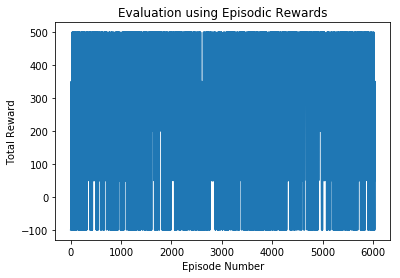

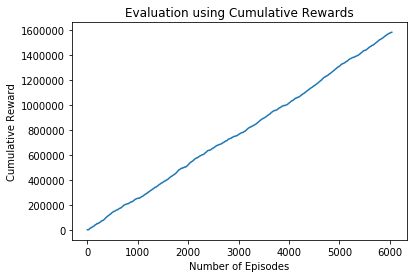

2049.98	2049.98	2049.98	2199.98	2199.98	2199.98	2349.98	2349.98	2349.98	2499.98	2499.98	2499.98	
2049.98	2049.98	2049.98	2199.98	2199.98	2199.98	2349.98	2349.98	2349.98	2499.98	2499.98	2499.98	
2049.98	2049.98	2049.98	2199.98	2199.98	2199.98	2349.98	2349.98	2349.98	2499.98	2499.98	2499.98	
2049.98	2049.98	2049.98	2199.98	2199.98	2199.98	2349.98	2349.98	2349.98	2499.98	2499.98	2499.98	
2049.98	2049.98	2049.98	2199.98	2199.98	2199.98	2349.98	2349.98	2349.98	2499.98	2499.98	2499.98	


In [30]:
def q_learning(): 
    request_list = requests() 
    #print request_list 
    get_item_array = [] 
    get_action_array = [] 
    reward_array = [] 
    cumulative_array = [] 
    for req in request_list: 
        r = req.split(' ') 
        reward = 0 
        print req 
        if (r[0].strip() == "STORE"): 
            rack = egreedy(int(r[1])-1) 
            print "rack", rack 
            if(r[1] == "5"): get_action_array.append(rack)  
            Store(rack, int(r[1]), int(r[2])) 
            #print_warehouse()
        else: #Get request 
            rack, reward = Get(int(r[1]), int(r[2])) 
            reward_array.append(reward) 
            get_item_array.append(int(r[1])) # make get_item_array 
            if (rack != 0): 
                update_Q(int(r[1])-1, rack-1) 
    print probability_distribution(get_item_array) 
    plot(reward_array, "Evaluation using Episodic Rewards", "Episode Number", "Total Reward") 
    cumulative_array = np.cumsum(reward_array) 
    plot(cumulative_array, "Evaluation using Cumulative Rewards", "Number of Episodes", "Cumulative Reward") 
    #print get_action_array 
q_learning() 
print_matrix(Q) 


In [28]:
print_warehouse() 


    I    

1->(5, 1698)	
2->(5, 582)	
3->(0, 0)	

4->(5, 886)	
5->(1, 1473)	
6->(5, 898)	

7->(2, 875)	
8->(3, 774)	
9->(2, 181)	

10->(2, 1607)	
11->(3, 358)	
12->(2, 960)	

    O    
